# Logistic Regr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv("pokemon.csv")

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [5]:
df.isna().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 70.4+ KB


In [7]:
# SAYISAL VERİ İLE İŞLEM YAPMAK İÇİN

map_legend = {
    True : 1 ,
    False: 0
    }

In [8]:
df["Legendary"] = df["Legendary"].map(map_legend)

In [9]:
df["Legendary"]

0      0
1      0
2      0
3      0
4      0
      ..
737    1
738    1
739    1
740    1
741    1
Name: Legendary, Length: 742, dtype: int64

In [10]:
#df["Type 1"].unique()
# .unique() → Tekrar edenleri kaldırarak eşsiz (unique) değerleri bir NumPy dizisi olarak döndürür.
#df["Type 1"].nunique()
# .nunique() → Bu sütundaki eşsiz (unique) değerlerin sayısını döndürür.


In [11]:
df.drop(["#" , "Name" , "Type 1" , "Type 2"] , axis=1 , inplace=True)

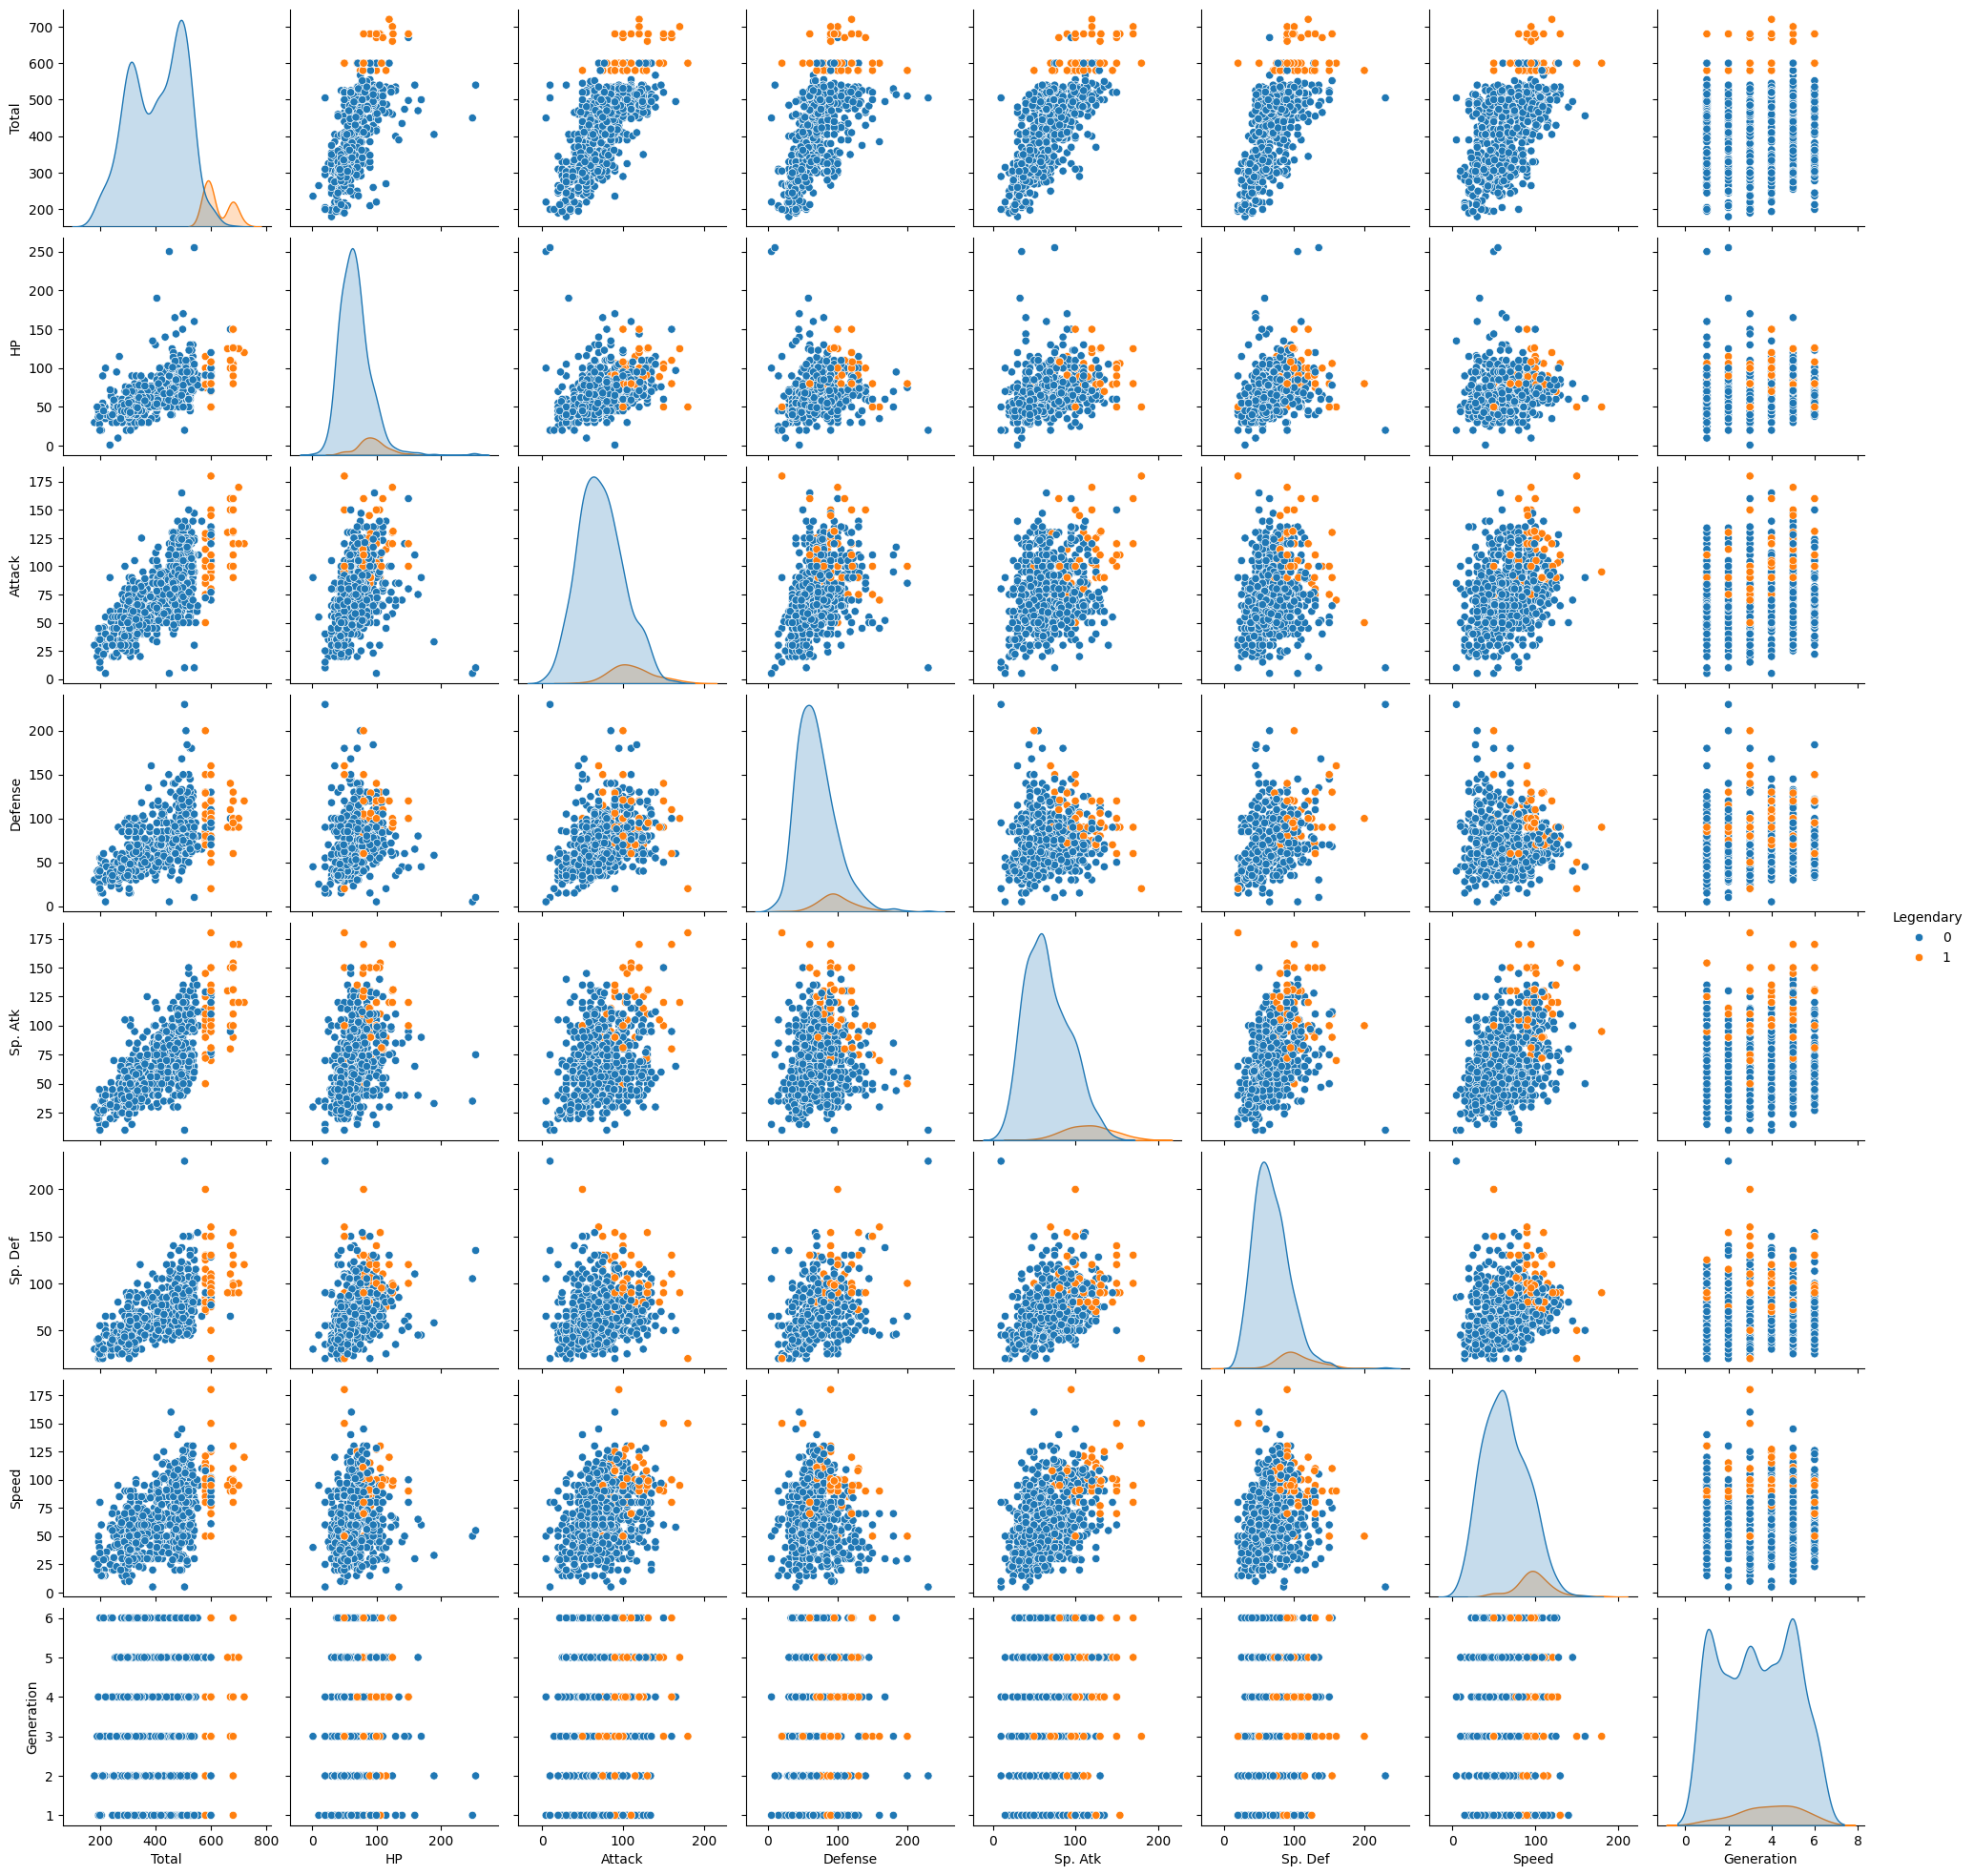

In [12]:
sns.pairplot(df , hue="Legendary")

<Axes: >

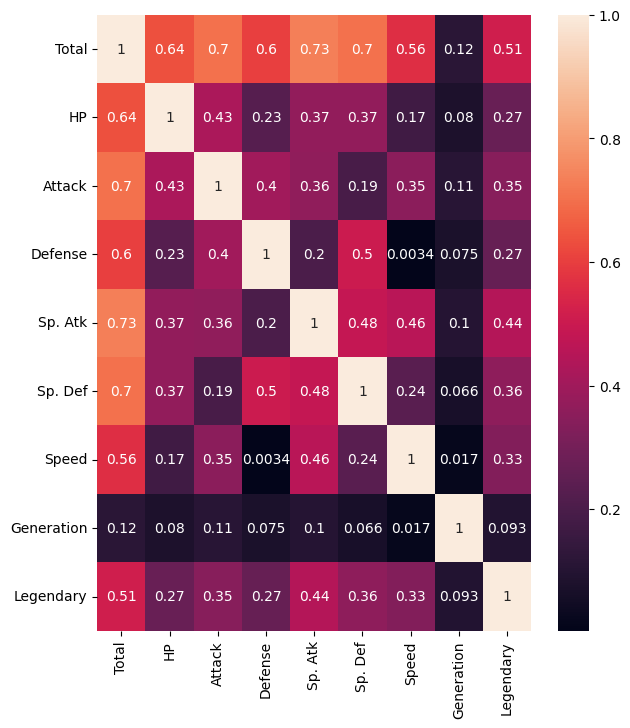

In [13]:
plt.figure(figsize=(7,8))
sns.heatmap(df.corr() , annot=True)

In [14]:
 #sns.scatterplot(x="Total" , y="Legendary" , data=df) 

<Axes: xlabel='HP', ylabel='Legendary'>

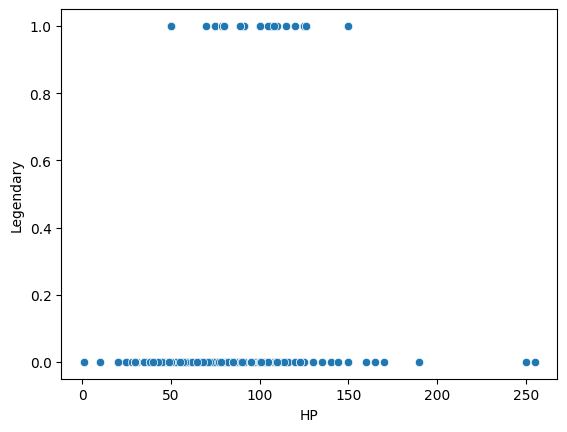

In [15]:
sns.scatterplot(x="HP" , y="Legendary" , data=df) 

# TRAİN TEST SPLİT

In [16]:
x = df.drop("Legendary" , axis=1)
y = df["Legendary"]

In [17]:
x.iloc[3:8] # 3 den 8 e kadar olan değerleri getir

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
3,309,39,52,43,60,50,65,1
4,405,58,64,58,80,65,80,1
5,534,78,84,78,109,85,100,1
6,314,44,48,65,50,64,43,1
7,405,59,63,80,65,80,58,1


In [18]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=9)

In [20]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()

In [23]:
log_model.fit(scaled_X_train , y_train)

LogisticRegression()

In [24]:
log_model.coef_
# Oluşan coef katsayıları 2 boyutlu olduğundan tek bir değer olarak gözükür

array([[ 1.56448829, -0.19764879,  0.96046563,  1.27569394,  1.44223281,
         1.14163345,  1.44524618, -0.03895381]])

In [25]:
coef = pd.Series(index=x.columns , data= log_model.coef_[0])
# Burda ilk indexteki değerleri alıp tablo haline getirdik

In [26]:
coef

Total         1.564488
HP           -0.197649
Attack        0.960466
Defense       1.275694
Sp. Atk       1.442233
Sp. Def       1.141633
Speed         1.445246
Generation   -0.038954
dtype: float64

In [27]:
coef.sort_values(inplace=True)

C:\Users\hdgn5\AppData\Local\Temp\ipykernel_15864\3542069269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.index , y= coef.values , palette="bright")


<Axes: xlabel='None'>

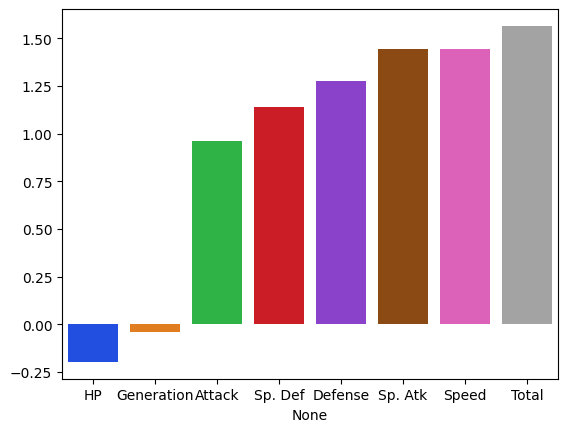

In [28]:
sns.barplot(x=coef.index , y= coef.values , palette="bright")

# Performans

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay , classification_report  

In [30]:
legend_pred = log_model.predict(scaled_X_test)

In [31]:
accuracy_score(y_test , legend_pred)

0.968609865470852

In [32]:
confusion_matrix(y_test ,legend_pred)
# Sonuçlanan matris


array([[204,   3],
       [  4,  12]])

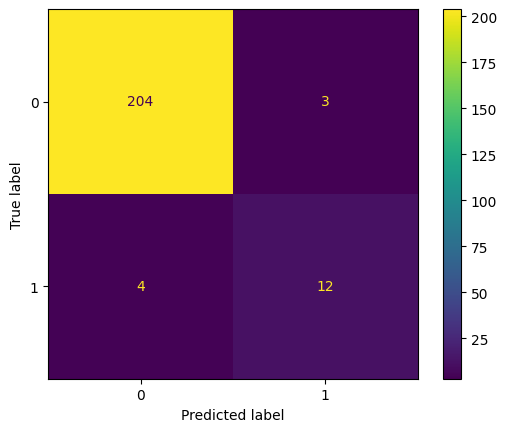

In [33]:
ConfusionMatrixDisplay.from_estimator(log_model , scaled_X_test,y_test )
# normalize="true" yazarsak yüzde olarak değer verecektir.


* True Positive
* True Negative
* False Positive
* False Negative

In [34]:
# Precision = Benim tahmin ettiklerimden kaçı doğru
# Recall = Doğru olanlardan ben kaçını tahmin edebildim

In [35]:
print(classification_report(y_test  , legend_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.80      0.75      0.77        16

    accuracy                           0.97       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.97      0.97      0.97       223



In [36]:
from sklearn.metrics import PrecisionRecallDisplay , RocCurveDisplay

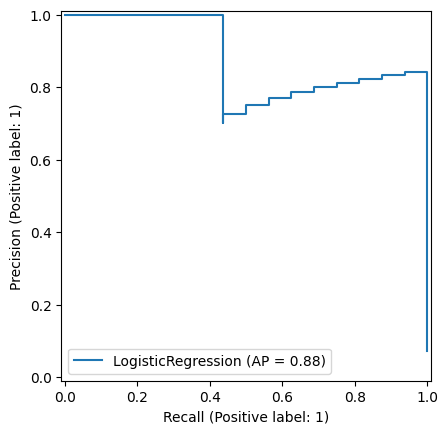

In [37]:
PrecisionRecallDisplay.from_estimator(log_model , scaled_X_test , y_test)

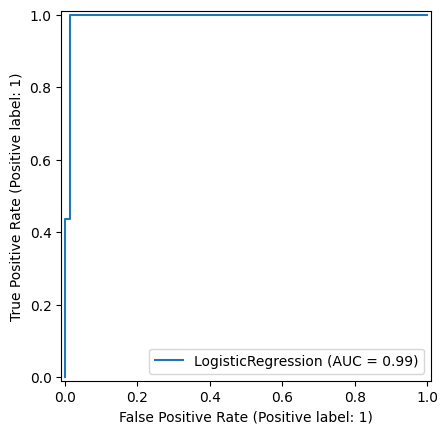

In [38]:
RocCurveDisplay.from_estimator(log_model , scaled_X_test , y_test)

## Deneme ve Hatalı Pokeler

In [39]:
df.max()

Total         720
HP            255
Attack        180
Defense       230
Sp. Atk       180
Sp. Def       230
Speed         180
Generation      6
Legendary       1
dtype: int64

In [40]:
poke_1 = [[620 , 150 , 130 , 150 , 170,100,160,2]]
poke_scaled_1 = scaler.transform(poke_1)
log_model.predict(poke_scaled_1)

# Pokemon efsaneviymiş

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [41]:
log_model.predict_proba(poke_scaled_1)

# Çıkan değerlerden biri efso olma  [6.53405172e-05
# Diğeri olmama olasılığıdır 9.99934659e-01]

array([[6.53405172e-05, 9.99934659e-01]])

In [42]:

log_model.predict_proba(poke_scaled_1)[0,1]*100

# predict_proba fonksiyonu, modelin 
# bir Pokémon'un efsanevi (legendary)
# olma olasılığını hesaplıyor ve ardından bunun yüzdesi alınıyor.

np.float64(99.99346594828162)

In [43]:
poke_2 = [[62 , 15 , 13 , 15 , 17,10,16,2]]
poke_scaled_2 = scaler.transform(poke_2)
log_model.predict(poke_scaled_2)

# Pokemon efsanevi değilmiş

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [44]:
log_model.predict_proba(poke_scaled_2)[0,1]*100

np.float64(8.849091057053145e-10)

In [53]:
wrong = (y_test !=legend_pred )

In [47]:
wrong_df = pd.DataFrame(wrong)

In [54]:
wrong_df  # False doğru tahmin edilenler

,Legendary
637,False
91,False
302,False
281,False
30,False
...,...
670,False
671,False
705,False
606,False


In [49]:
wrong_df[wrong_df["Legendary"] == True] # Yanlış tahmin edilenler

,Legendary
667,True
649,True
489,True
737,True
725,True
651,True
646,True


In [50]:
df.loc[[667 ,737]]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
667,600,71,120,95,120,95,99,5,0
737,600,108,100,121,81,95,95,6,1


# Çıkan değerlerden 1. si için (667)
 * Efso değilmiş ama pc efso demiş


 # Çıkan değerlerden 2. si için (737)
 * Efsoymuş ama pc efso değil demiş
 

C:\Users\hdgn5\AppData\Local\Temp\ipykernel_15864\3836100325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.index , y=coef.values , palette="bright")


<Axes: xlabel='None'>

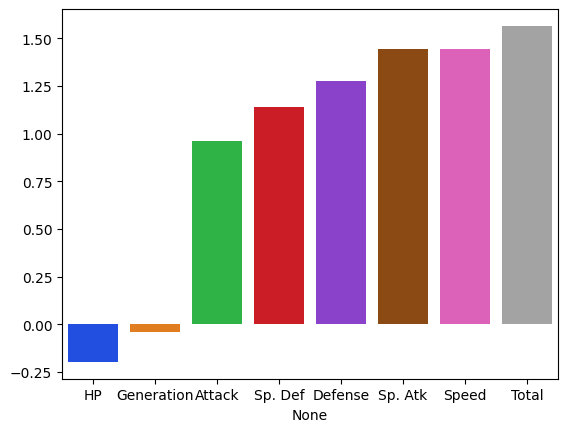

In [51]:
sns.barplot(x=coef.index , y=coef.values , palette="bright")

<Axes: >

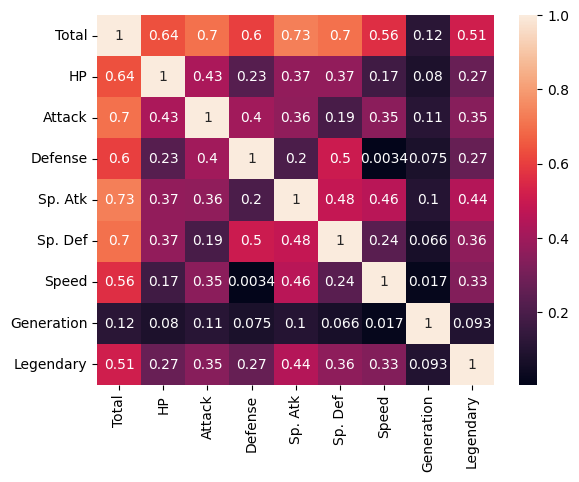

In [52]:
sns.heatmap(df.corr() , annot=True)